<a href="https://colab.research.google.com/github/Suriyabalu/ML-practise-/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup
import csv

In [3]:
A_url = 'https://www.amazon.in/s?k=mobiles&i=electronics&rh=n%3A976419031&page=2&qid=1680185863&ref=sr_pg_'
headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"}

A_data = {"Name":[],"Price":[]}
for n in range(1, 20):  
        url = A_url + str(n)
        response = requests.get(url,headers=headers)
        A_soup = BeautifulSoup(response.content, 'html.parser')
        A_mobiles = A_soup.find_all('div', {'data-component-type': 's-search-result'})
        for mobile in A_mobiles:
          name = mobile.find('span', {'class': 'a-size-medium'}).text.strip()   
          try:
              price = mobile.find('span', {'class': 'a-price-whole'}).text.strip()
          except:
              price = None
          try:
              rating = mobile.find('span', {'class': 'a-icon-alt'}).text.split(' ')[0].strip()
          except:
              rating = None
          if price is not None and rating is not None :
            if float(rating) >=4 and float(rating)<=5:
              A_data['Name'].append(name)
              A_data['Price'].append(price)

A_df = pd.DataFrame.from_dict(A_data)

In [4]:
A_df

,Name,Price
0,"Tecno Spark 8T (Atlantic Blue, 4GB RAM,64GB St...","8,299"
1,"Samsung Galaxy M13 (Midnight Blue, 4GB, 64GB S...","9,699"
2,"Samsung Galaxy M33 5G (Mystique Green, 8GB, 12...","18,499"
3,"iQOO Z7 5G by vivo (Pacific Night, 6GB RAM, 12...","18,999"
4,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","18,999"
...,...,...
326,"realme narzo 50i (Carbon Black, 4GB RAM+64GB S...","8,999"
327,realme narzo 50i Prime (Mint Green 3GB RAM+32G...,"6,299"
328,"Samsung Galaxy M33 5G (Deep Ocean Blue, 6GB, 1...","17,999"
329,"Vivo Y56 5G (Orange Shimmer, 8GB RAM, 128GB St...","19,999"


In [5]:
F_url = 'https://www.flipkart.com/search?q=Mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page='
headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"}
F_data = {"Name":[],"Price":[]}
for n in range(1, 20):  
        url = F_url + str(n)
        response = requests.get(url,headers=headers)
        F_soup = BeautifulSoup(response.content, 'html.parser')
        F_mobiles = F_soup.findAll('div', attr = {'class': '_1AtVbE'})
        
        for mobile in F_soup.find_all('div', attrs = {'class': '_1AtVbE'}):
          name = mobile.find('div', attrs = {'class': '_4rR01T'})
          try:
              price = mobile.find('div', attrs = {'class': '_30jeq3 _1_WHN1'})
          except:
              price = None
          try:
              rating = mobile.find('div', attrs = {'class': '_3LWZlK'}).text.split(' ')[0].strip()
          except:
              rating = None
          if price is not None and rating is not None :
            if float(rating) >=4 and float(rating)<=5:
              F_data['Name'].append(name.text)
              F_data['Price'].append(price.text.strip())
F_df = pd.DataFrame.from_dict(F_data)
F_df

,Name,Price
0,"POCO C31 (Royal Blue, 64 GB)","₹7,499"
1,"POCO C31 (Royal Blue, 32 GB)","₹6,499"
2,"realme C30 (Bamboo Green, 32 GB)","₹5,749"
3,"realme C30 (Denim Black, 32 GB)","₹5,749"
4,"realme C30 (Lake Blue, 32 GB)","₹5,749"
...,...,...
404,"Infinix Zero 20 (DEEP GRAY, 128 GB)","₹16,999"
405,"Infinix Zero 20 (Green Fantasy, 128 GB)","₹16,999"
406,"OPPO F19 (Midnight Blue, 128 GB)","₹14,990"
407,"OPPO F19 (Prism Black, 128 GB)","₹14,990"


In [6]:
df1 = F_df
df2 = A_df  
F_df

,Name,Price
0,"POCO C31 (Royal Blue, 64 GB)","₹7,499"
1,"POCO C31 (Royal Blue, 32 GB)","₹6,499"
2,"realme C30 (Bamboo Green, 32 GB)","₹5,749"
3,"realme C30 (Denim Black, 32 GB)","₹5,749"
4,"realme C30 (Lake Blue, 32 GB)","₹5,749"
...,...,...
404,"Infinix Zero 20 (DEEP GRAY, 128 GB)","₹16,999"
405,"Infinix Zero 20 (Green Fantasy, 128 GB)","₹16,999"
406,"OPPO F19 (Midnight Blue, 128 GB)","₹14,990"
407,"OPPO F19 (Prism Black, 128 GB)","₹14,990"


In [7]:
b1=[]
for i in df1['Name']:
  b1.append(i.split(' ',1)[0])
df1['Brand'] = b1
df1["Brand"]=df1['Brand'].str.upper()
df1.head()

,Name,Price,Brand
0,"POCO C31 (Royal Blue, 64 GB)","₹7,499",POCO
1,"POCO C31 (Royal Blue, 32 GB)","₹6,499",POCO
2,"realme C30 (Bamboo Green, 32 GB)","₹5,749",REALME
3,"realme C30 (Denim Black, 32 GB)","₹5,749",REALME
4,"realme C30 (Lake Blue, 32 GB)","₹5,749",REALME


In [8]:
b2=[]
for i in df2['Name']:
  b2.append(i.split(' ',1)[0])
df2['Brand'] = b2
df2["Brand"]=df2["Brand"].str.upper()
df2.head()

,Name,Price,Brand
0,"Tecno Spark 8T (Atlantic Blue, 4GB RAM,64GB St...","8,299",TECNO
1,"Samsung Galaxy M13 (Midnight Blue, 4GB, 64GB S...","9,699",SAMSUNG
2,"Samsung Galaxy M33 5G (Mystique Green, 8GB, 12...","18,499",SAMSUNG
3,"iQOO Z7 5G by vivo (Pacific Night, 6GB RAM, 12...","18,999",IQOO
4,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","18,999",ONEPLUS


In [9]:
df1["Brand"].nunique(),df2["Brand"].nunique()

(21, 12)

In [10]:
df1["Brand"].unique(),df2["Brand"].unique()

(array(['POCO', 'REALME', 'SAMSUNG', 'MOTOROLA', 'VIVO', 'NOKIA',
        'INFINIX', 'APPLE', 'REDMI', 'ONEPLUS', 'OPPO', 'LAVA', 'MICROMAX',
        'ITEL', 'KECHAODA', 'GOOGLE', 'KARBONN', 'DIZO', 'SNEXIAN',
        'NOTHING', 'TECNO'], dtype=object),
 array(['TECNO', 'SAMSUNG', 'IQOO', 'ONEPLUS', 'LAVA', 'REDMI', 'REALME',
        'VIVO', 'MI', 'OPPO', 'APPLE', 'MOTOROLA'], dtype=object))

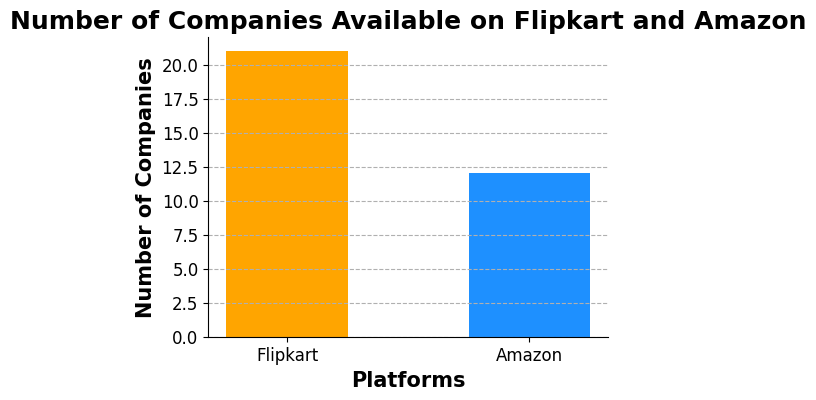

In [11]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0, 0, 1, 1])
X = ['Flipkart', 'Amazon']
Y = [df1['Brand'].nunique(), df2['Brand'].nunique()]
ax.bar(X, Y, width=0.5, color=['#FFA500', '#1E90FF'])
plt.title('Number of Companies Available on Flipkart and Amazon', fontweight='bold', fontsize=18)
plt.xlabel('Platforms', fontweight='bold', fontsize=15)
plt.ylabel('Number of Companies', fontweight='bold', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [12]:
print("Brands that are available in Flipkart and not in Amazon")
for i in df1["Brand"].unique():
  if i not in df2["Brand"].unique():
    print(i)

Brands that are available in Flipkart and not in Amazon
POCO
NOKIA
INFINIX
MICROMAX
ITEL
KECHAODA
GOOGLE
KARBONN
DIZO
SNEXIAN
NOTHING


In [13]:
print("Brands that are available in Amazon and not in Flipkart")
for i in df2["Brand"].unique():
  if i not in df1["Brand"].unique():
    print(i)

Brands that are available in Amazon and not in Flipkart
IQOO
MI


In [14]:
print("Brands that are available in both Amazon and Flipkart")

list(set(df2["Brand"].unique()).intersection(df1["Brand"].unique()))

Brands that are available in both Amazon and Flipkart


['MOTOROLA',
 'OPPO',
 'TECNO',
 'ONEPLUS',
 'REALME',
 'SAMSUNG',
 'REDMI',
 'LAVA',
 'VIVO',
 'APPLE']

In [32]:
df1['Brand'].value_counts()

REALME      70
REDMI       47
POCO        44
SAMSUNG     41
INFINIX     38
MOTOROLA    34
VIVO        28
LAVA        20
NOKIA       18
ITEL        15
OPPO        13
APPLE       10
ONEPLUS      9
KECHAODA     7
MICROMAX     4
NOTHING      4
GOOGLE       2
KARBONN      2
DIZO         1
SNEXIAN      1
TECNO        1
Name: Brand, dtype: int64

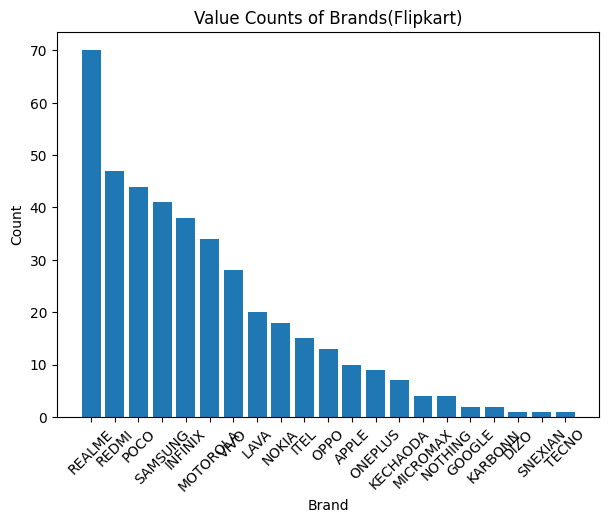

In [41]:
counts = df1['Brand'].value_counts()
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(counts.index, counts.values)
ax.set_title('Value Counts of Brands(Flipkart)')
ax.set_xlabel('Brand')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45) 
plt.show()

In [31]:
df2['Brand'].value_counts()

SAMSUNG     66
REALME      57
ONEPLUS     41
REDMI       37
LAVA        36
TECNO       34
IQOO        23
VIVO        16
MI           8
OPPO         6
APPLE        4
MOTOROLA     3
Name: Brand, dtype: int64

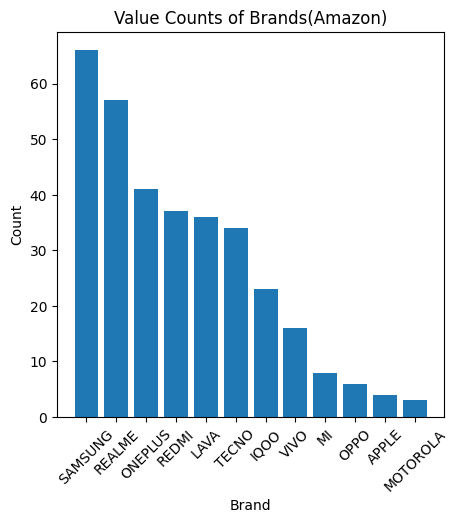

In [39]:
counts = df2['Brand'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(counts.index, counts.values)
ax.set_title('Value Counts of Brands(Amazon)')
ax.set_xlabel('Brand')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45) 
plt.show()

In [16]:
df1

,Name,Price,Brand
0,"POCO C31 (Royal Blue, 64 GB)","₹7,499",POCO
1,"POCO C31 (Royal Blue, 32 GB)","₹6,499",POCO
2,"realme C30 (Bamboo Green, 32 GB)","₹5,749",REALME
3,"realme C30 (Denim Black, 32 GB)","₹5,749",REALME
4,"realme C30 (Lake Blue, 32 GB)","₹5,749",REALME
...,...,...,...
404,"Infinix Zero 20 (DEEP GRAY, 128 GB)","₹16,999",INFINIX
405,"Infinix Zero 20 (Green Fantasy, 128 GB)","₹16,999",INFINIX
406,"OPPO F19 (Midnight Blue, 128 GB)","₹14,990",OPPO
407,"OPPO F19 (Prism Black, 128 GB)","₹14,990",OPPO


180 169 60


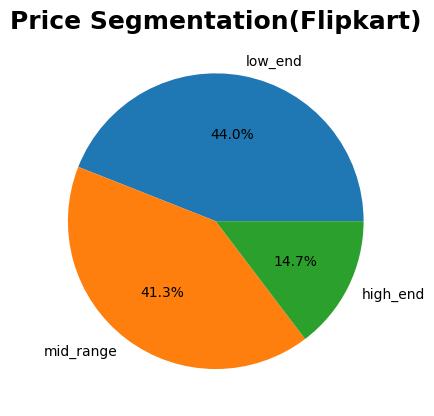

In [17]:
mid_range=0
low_end=0
high_end=0
df1["Price"] = df1["Price"].str.replace('₹', '').str.replace(',', '').astype(float)
for i in df1["Price"]:
  if i <= 10000.00:
    low_end +=1
  elif i > 10000 and i <= 20000:
    mid_range += 1
  elif i > 20000:
    high_end +=1
print(low_end,mid_range,high_end)
values=[low_end,mid_range,high_end]
labels = ['low_end','mid_range','high_end']
plt.title('Price Segmentation(Flipkart)', fontweight='bold', fontsize=18)
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.show()

102 196 33


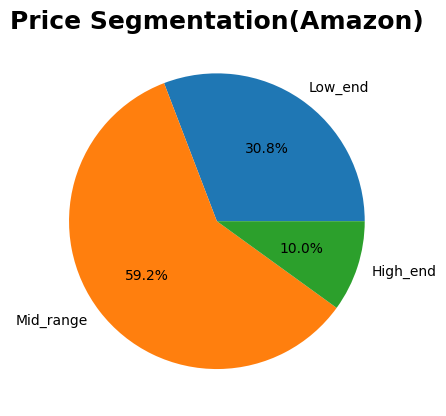

In [18]:
Mid_range=0
Low_end=0
High_end=0
df2["Price"] = df2["Price"].str.replace('₹', '').str.replace(',', '').astype(float)
for i in df2["Price"]:
  if i <= 10000:
    Low_end +=1
  elif i > 10000 and i <= 20000:
    Mid_range += 1
  elif i > 20000:
    High_end +=1
print(Low_end,Mid_range,High_end)
values=[Low_end,Mid_range,High_end]
labels = ['Low_end','Mid_range','High_end']
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('Price Segmentation(Amazon)', fontweight='bold', fontsize=18)
plt.show()

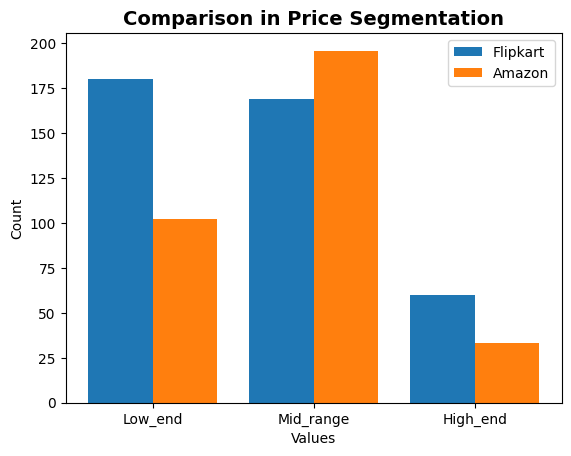

In [19]:
Flipkart_values = [low_end,mid_range,high_end]
Amazon_values = [Low_end,Mid_range,High_end]
Labels = ['Low_end','Mid_range','High_end']
x_pos=np.arange(len(labels))
plt.bar(x_pos,Flipkart_values,width=0.4,label="Flipkart")
plt.bar(x_pos+0.4, Amazon_values,width=0.4,label="Amazon")
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Comparison in Price Segmentation',fontweight='bold', fontsize=14)
plt.xticks(x_pos + 0.2, labels)
plt.legend()
plt.show()

In [20]:
M=df1.loc[df1['Price'].idxmax(),"Name"]
print("Phone with the highest cost in Flipkart-",M)

Phone with the highest cost in Flipkart- APPLE iPhone 14 Plus (Starlight, 128 GB)


In [21]:
N=df2.loc[df2['Price'].idxmax(),"Name"]
print("Phone with the highest cost in Amazon-",N)

Phone with the highest cost in Amazon- Apple iPhone 13 (128GB) - Blue


In [22]:
FMode_price=df1['Price'].mode()[0]
FMode_mobiles=df1[df1['Price']==FMode_price]['Name']
print("Mode price",FMode_price)
print("Mobiles wat mode value of priceFMode_pricein Flipkart ",FMode_mobiles)

Mode price 16999.0
Mobiles wat mode value of priceFMode_pricein Flipkart  88     SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)
96          MOTOROLA G62 5G (Midnight Gray, 128 GB)
99           MOTOROLA G62 5G (Frosted Blue, 128 GB)
110       SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)
122    SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)
141    Infinix Note 12 Pro 5G (Force Black, 128 GB)
142       Infinix Note 12 Pro 5G (Snowfall, 128 GB)
291             realme 9i 5G (Soulful Blue, 128 GB)
306                  realme 10 (Rush Black, 128 GB)
339     Infinix Zero 5G 2023 (Pearly White, 128 GB)
340     Infinix Zero 5G 2023 (Coral Orange, 128 GB)
345                 realme 10 (Clash White, 128 GB)
351     Infinix Zero 5G 2023 (Pearly White, 128 GB)
352     Infinix Zero 5G 2023 (Coral Orange, 128 GB)
361                 realme 10 (Clash White, 128 GB)
380          Infinix Zero 20 (Glitter Gold, 128 GB)
404             Infinix Zero 20 (DEEP GRAY, 128 GB)
405         Infinix Zero 20 (Green Fantasy

In [23]:
AMode_price=df2['Price'].mode()[0]
AMode_mobiles=df2[df2['Price']==AMode_price]['Name']
print("Mode price in Amazon",AMode_price)
print("Mobiles wat mode value of priceFMode_pricein Amazon ",AMode_mobiles)

Mode price in Amazon 10999.0
Mobiles wat mode value of priceFMode_pricein Amazon  5      Lava Blaze 5G (Glass Green, 4GB RAM, UFS 2.2 1...
8      Lava Blaze 5G (Glass Blue, 4GB RAM, UFS 2.2 12...
22     Lava Blaze 5G (Glass Green, 4GB RAM, UFS 2.2 1...
25     Lava Blaze 5G (Glass Blue, 4GB RAM, UFS 2.2 12...
41     MI Poco M2 Pro (Out of The Blue, 4GB RAM, 64GB...
43     Lava Blaze 5G (Glass Blue, 4GB RAM, UFS 2.2 12...
48     Lava Blaze 5G (Glass Green, 4GB RAM, UFS 2.2 1...
59     MI Poco M2 Pro (Out of The Blue, 4GB RAM, 64GB...
67     Lava Blaze 5G (Glass Blue, 4GB RAM, UFS 2.2 12...
79     MI Poco M2 Pro (Out of The Blue, 4GB RAM, 64GB...
87     Lava Blaze 5G (Glass Blue, 4GB RAM, UFS 2.2 12...
96     Lava Blaze 5G (Glass Green, 4GB RAM, UFS 2.2 1...
99     Lava Blaze 5G (Glass Blue, 4GB RAM, UFS 2.2 12...
113    Lava Blaze 5G (Glass Green, 4GB RAM, UFS 2.2 1...
116    Lava Blaze 5G (Glass Blue, 4GB RAM, UFS 2.2 12...
130    Lava Blaze 5G (Glass Green, 4GB RAM, UFS 2.2 1...
133   

In [24]:
merged_df = pd.merge(df1,df2,on="Name")
merged_df

,Name,Price_x,Brand_x,Price_y,Brand_y


In [25]:
merged_df = pd.merge(df1,df2,on="Price",how="inner")

count = merged_df.shape[0]
count

1900

In [26]:
merged_df

,Name_x,Price,Brand_x,Name_y,Brand_y
0,"POCO C31 (Royal Blue, 64 GB)",7499.0,POCO,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",REDMI
1,"POCO C31 (Royal Blue, 64 GB)",7499.0,POCO,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",REDMI
2,"POCO C31 (Royal Blue, 64 GB)",7499.0,POCO,"realme narzo 50i (Carbon Black, 2GB RAM+32GB S...",REALME
3,"POCO C31 (Royal Blue, 64 GB)",7499.0,POCO,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",REDMI
4,"POCO C31 (Royal Blue, 64 GB)",7499.0,POCO,"realme narzo 50i (Carbon Black, 2GB RAM+32GB S...",REALME
...,...,...,...,...,...
1895,"vivo Y35 (Agate Black, 128 GB)",18499.0,VIVO,"Samsung Galaxy M33 5G (Mystique Green, 8GB, 12...",SAMSUNG
1896,"vivo Y35 (Agate Black, 128 GB)",18499.0,VIVO,"Samsung Galaxy M33 5G (Mystique Green, 8GB, 12...",SAMSUNG
1897,Nokia 105,1399.0,NOKIA,Motorola a10 Dual Sim keypad Mobile with 1750 ...,MOTOROLA
1898,Nokia 105,1399.0,NOKIA,Motorola a10 Dual Sim keypad Mobile with 1750 ...,MOTOROLA


In [27]:
df1.head(20)

,Name,Price,Brand
0,"POCO C31 (Royal Blue, 64 GB)",7499.0,POCO
1,"POCO C31 (Royal Blue, 32 GB)",6499.0,POCO
2,"realme C30 (Bamboo Green, 32 GB)",5749.0,REALME
3,"realme C30 (Denim Black, 32 GB)",5749.0,REALME
4,"realme C30 (Lake Blue, 32 GB)",5749.0,REALME
5,"realme C30 (Denim Black, 32 GB)",6749.0,REALME
6,"realme C30 (Lake Blue, 32 GB)",6749.0,REALME
7,"POCO C31 (Shadow Gray, 64 GB)",7499.0,POCO
8,"realme C30 (Bamboo Green, 32 GB)",6749.0,REALME
9,"POCO M4 5G (Power Black, 64 GB)",12999.0,POCO


In [28]:
# df1=df1.drop(["color"],axis=1)
# print(df1)

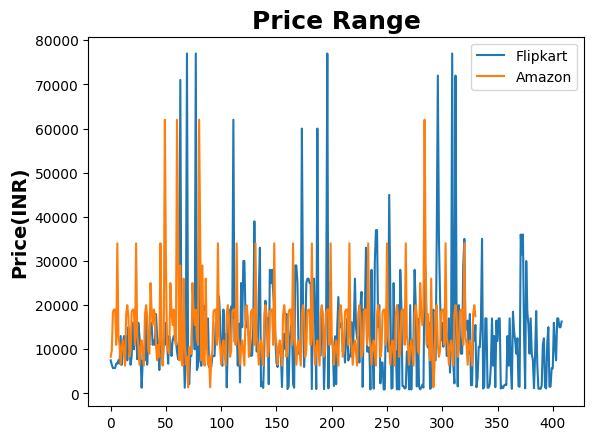

In [29]:
import matplotlib.pyplot as plt
import pandas as pd


plt.plot(df1['Price'], label="Flipkart")
plt.plot(df2['Price'], label="Amazon")

plt.title('Price Range', fontsize=18, fontweight='bold')
plt.ylabel('Price(INR)', fontsize=14, fontweight='bold')

plt.legend()
plt.show()